# Lazada Airfryer Data Analytic

For Colab Uncomment next cell first

In [1]:
'''
! wget https://raw.githubusercontent.com/anuwatavis/dataset/master/lareview/itemData_0_499.csv
! wget https://raw.githubusercontent.com/anuwatavis/dataset/master/lareview/itemData_500_999.csv

!gdown --id 175HCEziwBcWBffjE9O50q4HivfB8DYE4
!gdown --id 1zT3xZTgWHiiMg5lwtB0iEjcVvFuu4O-7

!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
!pip install pythainlp

'''

'\n! wget https://raw.githubusercontent.com/anuwatavis/dataset/master/lareview/itemData_0_499.csv\n! wget https://raw.githubusercontent.com/anuwatavis/dataset/master/lareview/itemData_500_999.csv\n\n!gdown --id 175HCEziwBcWBffjE9O50q4HivfB8DYE4\n!gdown --id 1zT3xZTgWHiiMg5lwtB0iEjcVvFuu4O-7\n\n!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf\n!pip install pythainlp\n\n'

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#  จุดประสงค์
- วิเคราะห์การขายสินค้าประเภทหม้อทอดไร้น้ำมัน
- วิเคราะห์พฤติกรรมผู้ซื้อ
- หาว่าตัวแปรใดบ้างที่จะส่งผลต่อยอดขาย

# 1. การเก็บข้อมูล
scrapping data from lazada

In [3]:
df1 = pd.read_csv('itemData_0_499.csv')
df2 = pd.read_csv('itemData_500_999.csv')

In [4]:
df = pd.concat([df1,df2])
df = df.reset_index()
df.head()

,index,textTitle,sale_price,origin_price,discount,promotion,warranty,positive_seller_rating,ship_on_time,chat_response_rate,...,brand,score-average,rating-5,rating_4,rating_3,rating_2,rating_1,delivery_options,store_name,itemId
0,0,หม้อทอด เครื่องทอดไร้มัน หม้อทอดไร้น้ำมัน หม้อ...,"฿1,090.00","฿2,000.00",-0.46,"ซื้อขั้นต่ำ ฿1,000.00",ส่งสินค้าคืนร้านค้าได้โดยตรงภายใน 7 วันเหตุผลเ...,0.92,0.67,100%,...,No Brand,5.0,435.0,11.0,0.0,0.0,1.0,แบบธรรมดา5 วัน฿20.00สามารถเก็บเงินปลายทางได้,TOR-SHOP,910428590
1,1,หม้อทอด เครื่องทอดไร้มัน เครื่องทอดอัจฉริยะ หม...,"฿1,065.00","฿4,000.00",-0.73,NaN,ส่งสินค้าคืนร้านค้าได้โดยตรงภายใน 7 วันเหตุผลเ...,0.91,0.64,98%,...,No Brand,0.0,0.0,0.0,0.0,0.0,0.0,แบบธรรมดา5 วัน฿89.00สามารถเก็บเงินปลายทางได้,KOHLER,927648644
2,2,หม้อทอด หม้อทอดไฟฟ้า หม้อทอดลมร้อน หม้อทอดไฟฟ้...,"฿1,480.00","฿5,000.00",-0.70,NaN,ส่งสินค้าคืนร้านค้าได้โดยตรงภายใน 7 วันเหตุผลเ...,0.91,0.64,98%,...,No Brand,5.0,261.0,0.0,0.0,0.0,0.0,แบบธรรมดา5 วัน฿20.00สามารถเก็บเงินปลายทางได้,KOHLER,1090448591
3,3,หม้อทอด เครื่องทอดไร้มัน เครื่องทอดอัจฉริยะ หม...,"฿1,060.00","฿3,000.00",-0.65,NaN,ส่งสินค้าคืนร้านค้าได้โดยตรงภายใน 7 วันเหตุผลเ...,0.96,0.64,100%,...,No Brand,5.0,779.0,1.0,0.0,0.0,1.0,แบบธรรมดา5 วัน฿20.00สามารถเก็บเงินปลายทางได้,NAFENG,946708458
4,4,เครื่องทอดไฟฟ้า หม้อทอดไฟฟ้าไร้น้ำมัน หม้อทอดไ...,"฿1,065.00","฿3,555.00",-0.70,NaN,ส่งสินค้าคืนร้านค้าได้โดยตรงภายใน 7 วันเหตุผลเ...,0.96,0.69,97%,...,No Brand,0.0,0.0,0.0,0.0,0.0,0.0,แบบธรรมดา5 วัน฿89.00สามารถเก็บเงินปลายทางได้,FOTILE,907536712


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1000 non-null   int64  
 1   textTitle               989 non-null    object 
 2   sale_price              990 non-null    object 
 3   origin_price            958 non-null    object 
 4   discount                959 non-null    float64
 5   promotion               511 non-null    object 
 6   warranty                994 non-null    object 
 7   positive_seller_rating  821 non-null    float64
 8   ship_on_time            990 non-null    object 
 9   chat_response_rate      988 non-null    object 
 10  all_score               995 non-null    object 
 11  answer_response         609 non-null    object 
 12  brand                   995 non-null    object 
 13  score-average           995 non-null    float64
 14  rating-5                995 non-null    f

In [6]:
import matplotlib as mpl
fp = mpl.font_manager.FontProperties(family='Tahoma',size=13)
plt.rcParams['font.sans-serif']=['Tahoma']
plt.rcParams['axes.unicode_minus']=False
'''
# For colab
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
'''

"\n# For colab\nimport matplotlib as mpl\nmpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')\nmpl.rc('font', family='TH Sarabun New')\n"

# 2. การตั้งคำถาม ตั้งสมมติฐาน ตั้งเป้าหมายของการวิเคราะห์
## 2.1 ตั้งคำถาม
- ทำไมอันดับต้นๆถึงขายดี
- Brand ไหนที่คนนิยมที่สุด
- การจัดโปรโมชั่นมีผลต่อยอดขายหรือไม่
- คนนิยมซื้อสินค้าในช่วงราคาไหน
- ราคา/จำนวนวันในการส่งสินค้ามีผลมากน้อยต่อการซื้อเพียงใด
## 2.2 ตั้งสมมติฐาน
- philips / xiaomi น่าจะเป็นแบรนที่ขายดีอันดับต้นๆ
- สินค้าที่ค่าส่งถูกและส่งไวน่าจะขายดีกว่า

# Data Mart

## ข้อมูล ราคา

### นำ ฿ , ออกจาก string เพื่อแปลงเป็น float

In [7]:
df.sale_price = df.sale_price.str.replace('฿','')
df.sale_price = df.sale_price.str.replace(',','')
df.sale_price = df.sale_price.astype('float')

In [8]:
df.origin_price = df.origin_price.str.replace('฿','')
df.origin_price = df.origin_price.str.replace(',','')
df.origin_price = df.origin_price.astype('float')

Text(0, 0.5, 'จำนวน')

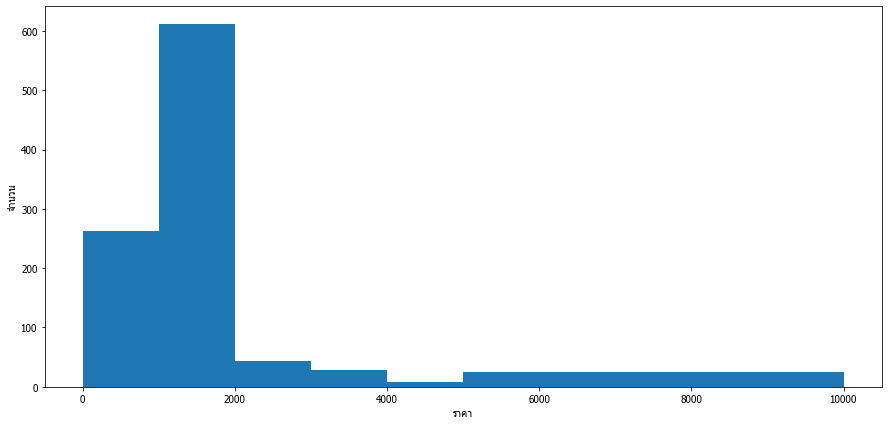

In [9]:
plt.figure(figsize=(15,7))
plt.hist(df.sale_price,bins=[0,1000,2000,3000,4000,5000,10000])
plt.xlabel("ราคา")
plt.ylabel("จำนวน")

- สินค้าเกินครึ่งมีราคาอยู่ในช่วง 1000-2000 บาท


Text(0, 0.5, 'จำนวน')

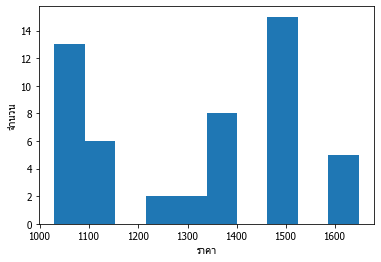

In [10]:
plt.hist(df.sale_price.loc[:50])
plt.xlabel("ราคา")
plt.ylabel("จำนวน")

- 50  อันดับแรกขายในช่วงราคา 1000-2000 ทั้งหมด
### สรุปราคาขาย
- สินค้าส่วนมากมีราคาอยู่ในช่วง 1000-2000 บาทและเป็นช่วงราคาที่ขายดีที่สุด

## Brand
### เปลี่ยน string ของ brand ให้อยู่รูปแบบเดียวกัน

In [11]:
df.brand = df.brand.str.title()

Text(0, 0.5, 'จำนวน')

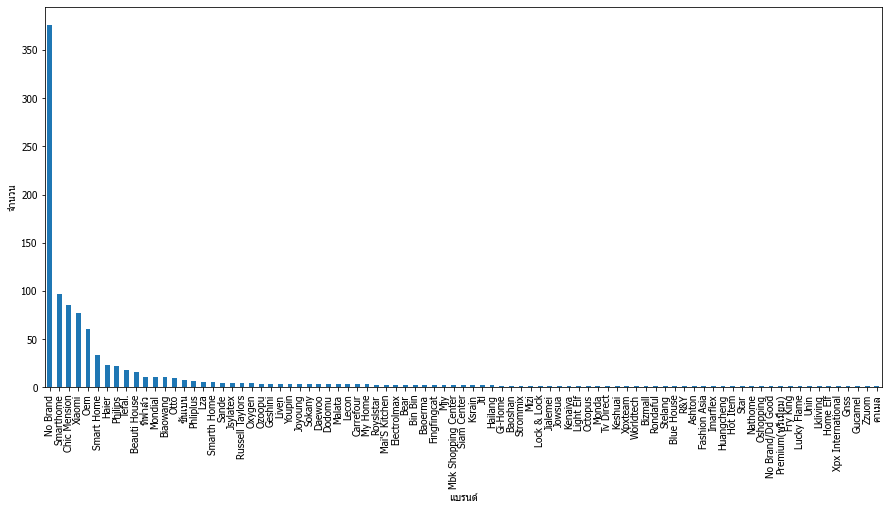

In [12]:
plt.figure(figsize=(15,7))
df.brand.value_counts().plot.bar()
plt.xlabel("แบรนด์")
plt.ylabel("จำนวน")

### สรุป Brand
- สินค้าส่วนใหญ่จะเป็นสินค้าไม่มีแบรนด์

## Warrnty
### ข้อมูลการรับประกัน free text -> group (warranty or no_warranty)

In [13]:
df.warranty[df.warranty.isna()] = 'no_warranty'
df.warranty[df.warranty.str.contains('ไม่มีการรับประกัน|ไม่มีการประกัน')] = 'no_warranty'
df.warranty[df.warranty.str.contains('มีการรับประกัน|รับประกันจาก')] = 'warranty'

/Users/layyer/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/layyer/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/layyer/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [14]:
df.head(5)

,index,textTitle,sale_price,origin_price,discount,promotion,warranty,positive_seller_rating,ship_on_time,chat_response_rate,...,brand,score-average,rating-5,rating_4,rating_3,rating_2,rating_1,delivery_options,store_name,itemId
0,0,หม้อทอด เครื่องทอดไร้มัน หม้อทอดไร้น้ำมัน หม้อ...,1090.0,2000.0,-0.46,"ซื้อขั้นต่ำ ฿1,000.00",warranty,0.92,0.67,100%,...,No Brand,5.0,435.0,11.0,0.0,0.0,1.0,แบบธรรมดา5 วัน฿20.00สามารถเก็บเงินปลายทางได้,TOR-SHOP,910428590
1,1,หม้อทอด เครื่องทอดไร้มัน เครื่องทอดอัจฉริยะ หม...,1065.0,4000.0,-0.73,NaN,no_warranty,0.91,0.64,98%,...,No Brand,0.0,0.0,0.0,0.0,0.0,0.0,แบบธรรมดา5 วัน฿89.00สามารถเก็บเงินปลายทางได้,KOHLER,927648644
2,2,หม้อทอด หม้อทอดไฟฟ้า หม้อทอดลมร้อน หม้อทอดไฟฟ้...,1480.0,5000.0,-0.70,NaN,no_warranty,0.91,0.64,98%,...,No Brand,5.0,261.0,0.0,0.0,0.0,0.0,แบบธรรมดา5 วัน฿20.00สามารถเก็บเงินปลายทางได้,KOHLER,1090448591
3,3,หม้อทอด เครื่องทอดไร้มัน เครื่องทอดอัจฉริยะ หม...,1060.0,3000.0,-0.65,NaN,warranty,0.96,0.64,100%,...,No Brand,5.0,779.0,1.0,0.0,0.0,1.0,แบบธรรมดา5 วัน฿20.00สามารถเก็บเงินปลายทางได้,NAFENG,946708458
4,4,เครื่องทอดไฟฟ้า หม้อทอดไฟฟ้าไร้น้ำมัน หม้อทอดไ...,1065.0,3555.0,-0.70,NaN,warranty,0.96,0.69,97%,...,No Brand,0.0,0.0,0.0,0.0,0.0,0.0,แบบธรรมดา5 วัน฿89.00สามารถเก็บเงินปลายทางได้,FOTILE,907536712


In [15]:
df.warranty.value_counts()

warranty       644
no_warranty    356
Name: warranty, dtype: int64

Text(0, 0.5, 'จำนวน')

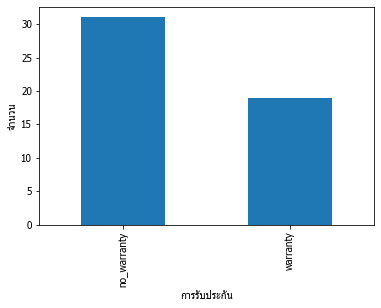

In [16]:
df.warranty.iloc[:50].value_counts().plot.bar()
plt.xlabel("การรับประกัน")
plt.ylabel("จำนวน")

### สรุป Warranty
- สินค้า 2 ใน 3 จะมีการรับประกัน
- สินค้าขายดี 50 อันดับแรกเกินครึ่งไม่มีการรับประกัน

## Promotion

In [17]:
df.promotion.value_counts()

ซื้อขั้นต่ำ ฿1,000.00                             76
ซื้อขั้นต่ำ ฿500.00                               70
ซื้อขั้นต่ำ  ฿500.00  รับส่วนลดสูงสุด  ฿500.00    30
ซื้อขั้นต่ำ ฿100.00                               29
ซื้อขั้นต่ำ ฿300.00                               25
                                                  ..
ซื้อขั้นต่ำ ฿2,599.00                              1
ซื้อขั้นต่ำ ฿1,090.00                              1
ซื้อขั้นต่ำ ฿650.00                                1
ซื้อทุก  ฿1,790.00, ลด ฿120.00                     1
ซื้อขั้นต่ำ ฿9,900.00                              1
Name: promotion, Length: 98, dtype: int64

In [18]:
import botnoiw2v as bw

In [19]:
df_promo = df[['promotion']]

In [20]:
promo_vec = np.vstack([bw.sentencevector(e) for e in df_promo.promotion.values])

In [21]:
from sklearn.cluster import KMeans

In [22]:
promo_clus = KMeans(n_clusters=3, random_state=0).fit_predict(promo_vec)

In [23]:
df_promo['promo_clus'] = promo_clus
df_promo.head(10)

/Users/layyer/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,promotion,promo_clus
0,"ซื้อขั้นต่ำ ฿1,000.00",1
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
5,"ซื้อขั้นต่ำ ฿1,000.00",1
6,"ซื้อขั้นต่ำ ฿1,000.00",1
7,NaN,0
8,"ซื้อขั้นต่ำ ฿1,000.00",1
9,NaN,0


In [24]:
print(df_promo[df_promo.promo_clus==0].values)

[[nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 [nan 0]
 

In [25]:
print(df_promo[df_promo.promo_clus==1].values)

[['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿599.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿1,000.00' 1]
 ['ซื้อขั้นต่ำ ฿

In [26]:
print(df_promo[df_promo.promo_clus==2].values)

[['ซื้อ2ลด1%' 2]
 ['ซื้อ2ลด2%; ซื้อ3ลด3%' 2]
 ['ซื้อ2ลด4%; ซื้อ3ลด6%; ซื้อ4ลด10%' 2]
 ['ซื้อ3ลด฿20.00; ซื้อ5ลด฿40.00' 2]
 ['ซื้อ2ลด1%' 2]
 ['ซื้อ2ลด1%' 2]
 ['ซื้อ2ลด3%; ซื้อ3ลด5%; ซื้อ5ลด8%' 2]
 ['ซื้อ3ลด2%; ซื้อ4ลด3%' 2]
 ['ซื้อ2ลด฿10.00; ซื้อ3ลด฿30.00; ซื้อ4ลด฿80.00' 2]
 ['ซื้อ2ลด5%' 2]
 ['ซื้อ2ลด1%' 2]
 ['ซื้อ3ลด2%; ซื้อ4ลด3%' 2]
 ['ซื้อ1ลด2%; ซื้อ2ลด3%; ซื้อ3ลด4%' 2]
 ['ซื้อ 2, ลด ฿20.00' 2]
 ['ซื้อ2ลด3%; ซื้อ3ลด5%; ซื้อ4ลด8%' 2]
 ['ซื้อ2ลด3%; ซื้อ3ลด5%; ซื้อ4ลด8%' 2]
 ['ซื้อ2ลด2%' 2]
 ['ซื้อ2ลด9%' 2]
 ['ซื้อ2ลด฿20.00; ซื้อ3ลด฿30.00; ซื้อ4ลด฿50.00' 2]
 ['ซื้อ2ลด1%' 2]
 ['ซื้อสินค้า 1 รายการ เพื่อรับของแถม' 2]
 ['ซื้อ 2, ลด ฿10.00' 2]
 ['ซื้อ2ลด3%; ซื้อ3ลด5%; ซื้อ4ลด8%' 2]
 ['ซื้อ3ลด฿20.00; ซื้อ5ลด฿40.00' 2]
 ['ซื้อ2ลด2%' 2]
 ['ซื้อ1ลด฿20.00; ซื้อ2ลด฿50.00; ซื้อ3ลด฿100.00' 2]
 ['ซื้อ 2, ลด ฿10.00' 2]
 ['ซื้อ2ลด3%; ซื้อ3ลด5%; ซื้อ4ลด8%' 2]
 ['ซื้อ2ลด1%' 2]
 ['ซื้อ2ลด2%' 2]
 ['ซื้อ2ลด1%' 2]
 ['ซื้อ2ลด2%; ซื้อ3ลด3%' 2]
 ['ซื้อ2ลด2%; ซื้อ3ลด3%; ซื้อ5ลด5%' 2]
 ['ซื้อ2ลด2%; ซื้อ3ลด3%; ซื้

Text(0, 0.5, 'จำนวน')

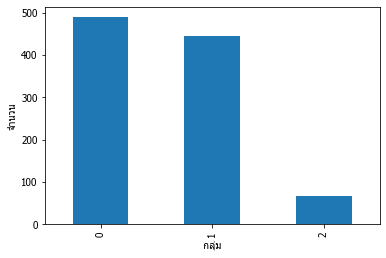

In [27]:
df_promo.promo_clus.value_counts().plot.bar()
plt.xlabel(" กลุ่ม ")
plt.ylabel("จำนวน")

### สรุป Promotion
**- แบ่ง 3 กลุ่ม**
1. ไม่มีโปรโมชั่น
2. ซื้อขั้นต่ำ
3. ซื้อจำกัดจำนวนชิ้นได้ลด

**-  สินค้าในตลาดครึ่งหนึ่งมีโปรโมชั่นอีกครึ่งไม่มี**

## delivery_options

In [28]:
df.delivery_options

0           แบบธรรมดา5 วัน฿20.00สามารถเก็บเงินปลายทางได้
1           แบบธรรมดา5 วัน฿89.00สามารถเก็บเงินปลายทางได้
2           แบบธรรมดา5 วัน฿20.00สามารถเก็บเงินปลายทางได้
3           แบบธรรมดา5 วัน฿20.00สามารถเก็บเงินปลายทางได้
4           แบบธรรมดา5 วัน฿89.00สามารถเก็บเงินปลายทางได้
                             ...                        
995    แบบธรรมดา3 วัน฿89.00ฟรีค่าจัดส่งเมื่อซื้อสินค้...
996            แบบธรรมดา3 วันฟรีสามารถเก็บเงินปลายทางได้
997                                     ส่งจากต่างประเทศ
998    แบบธรรมดา5 - 6 วัน฿134.00สามารถเก็บเงินปลายทางได้
999        แบบธรรมดา2 วัน฿109.00สามารถเก็บเงินปลายทางได้
Name: delivery_options, Length: 1000, dtype: object

### แบ่งการส่งเป็นข้อมูลต่างๆ ดังนี้
- ในประเทศ / ต่างประเทศ
- จำนวนวัน
- ค่าส่ง
- เก็บเงินปลายทาง

In [29]:
df_deli = df[['delivery_options']]

In [30]:
df[df_deli.delivery_options.str.contains('ธรรมดา')==False]

,index,textTitle,sale_price,origin_price,discount,promotion,warranty,positive_seller_rating,ship_on_time,chat_response_rate,...,brand,score-average,rating-5,rating_4,rating_3,rating_2,rating_1,delivery_options,store_name,itemId
103,103,Smarthome หม้อทอดไร้น้ำมัน ขนาด 3.5 ลิตร รุ่น ...,1424.0,3990.0,-0.64,NaN,warranty,0.93,0.9,NaN,...,Smarthome,4.8,79.0,8.0,0.0,0.0,2.0,ดำเนินการโดยลาซาด้า,Home Appliances,1141256664
107,107,Philips AirFryer HD9218/51หม้อทอดไร้น้ำมัน หม้...,5490.0,7990.0,-0.31,ซื้อขั้นต่ำ ฿999.00,warranty,0.94,0.96,99%,...,Philips,4.8,1002.0,96.0,18.0,4.0,19.0,Delivered by Seller,Philips,100988687
115,115,Haier หม้อทอดไร้น้ำมัน ความจุ 2.5 ลิตร รุ่น HA...,1590.0,3990.0,-0.60,NaN,warranty,0.91,0.94,89%,...,Haier,4.8,3092.0,248.0,47.0,15.0,41.0,ดำเนินการโดยลาซาด้า,ไฮเออร์,281320867
119,119,Smarthome หม้อทอดไร้น้ำมัน ขนาด 2.0 ลิตร รุ่น ...,890.0,2990.0,-0.70,NaN,warranty,0.93,0.9,NaN,...,Smarthome,4.7,48.0,6.0,3.0,1.0,0.0,ดำเนินการโดยลาซาด้า,Home Appliances,1141242895
138,138,Philips Airfryer หม้อทอดไร้น้ำมัน หม้อทอดอากาศ...,5294.0,7990.0,-0.34,NaN,warranty,0.95,0.91,100%,...,Philips,4.9,438.0,33.0,7.0,0.0,3.0,ดำเนินการโดยลาซาด้า,ฟิลิปส์,861362296
141,141,Philips Airfryer หม้อทอดอากาศ หม้อทอดไร้น้ำมัน...,9990.0,11990.0,-0.17,ซื้อขั้นต่ำ ฿999.00,warranty,0.94,0.96,99%,...,Philips,4.7,255.0,51.0,14.0,2.0,1.0,Delivered by Seller,Philips,100988690
147,147,OTTO หม้อทอดไร้น้ำมัน รุ่น CO-725 (สีดำ),1120.0,2600.0,-0.57,"ซื้อขั้นต่ำ ฿1,000.00 รับส่วนลดสูงสุด ฿200.00",warranty,0.90,0.96,NaN,...,Otto,4.7,412.0,39.0,14.0,7.0,19.0,ดำเนินการโดยลาซาด้า,OTTO,349970011
151,151,Philips Airfryer Twin TurboStar หม้อทอดไร้น้ำม...,10990.0,11990.0,-0.08,NaN,warranty,0.95,0.91,100%,...,Philips,4.9,56.0,2.0,0.0,1.0,0.0,ดำเนินการโดยลาซาด้า,ฟิลิปส์,861354374
161,161,Smarthome หม้อทอดไร้น้ำมัน ขนาด 2.0 ลิตร รุ่น ...,950.0,2990.0,-0.68,NaN,warranty,0.93,0.9,NaN,...,Smarthome,4.9,340.0,29.0,5.0,2.0,2.0,ดำเนินการโดยลาซาด้า,Home Appliances,1039294115
163,163,Smarthome หม้อทอดไร้น้ำมัน ความจุ 3.5 ลิตร รุ่...,1590.0,3990.0,-0.60,NaN,warranty,0.93,0.9,NaN,...,Smarthome,5.0,19.0,0.0,0.0,0.0,0.0,ดำเนินการโดยลาซาด้า,Home Appliances,1141298049


In [31]:
df_deli.delivery_options.str.contains('ต่างประเทศ').sum()

31

In [32]:
df_deli.isna().sum()

delivery_options    33
dtype: int64

In [33]:
len(df_deli[df_deli.delivery_options.str.contains('ธรรมดา|โดยลาซาด้า|Delivered by Seller')==True])

936

In [34]:
df_deli["howto_delivery"] = df_deli.delivery_options

/Users/layyer/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_deli["howto_delivery"][df_deli.delivery_options.str.contains('ธรรมดา') == True] = 'ธรรมดา'

/Users/layyer/anaconda3/envs/ai/lib/python3.7/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [36]:
df_deli.howto_delivery.value_counts()

ธรรมดา                 917
ส่งจากต่างประเทศ        31
ดำเนินการโดยลาซาด้า     15
Delivered by Seller      4
Name: howto_delivery, dtype: int64

In [37]:
def getDeliDay(word):
    text_index = word.find('วัน')
    if text_index == -1 :
        return None
    else :
        return int(word[text_index-2:text_index])

In [38]:
df_deli["sent_day"] = None

/Users/layyer/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
for i in df[df_deli.howto_delivery == 'ธรรมดา'].index:
    df_deli["sent_day"][i] = getDeliDay(df_deli.delivery_options[i])

/Users/layyer/anaconda3/envs/ai/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0, 0.5, 'จำนวน')

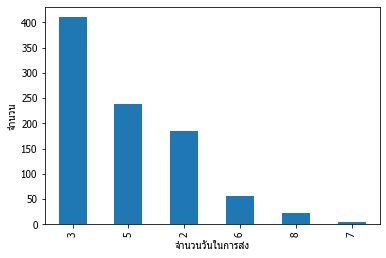

In [40]:
df_deli["sent_day"].value_counts().plot.bar()
plt.xlabel("จำนวนวันในการส่ง")
plt.ylabel("จำนวน")

In [41]:
def getShipFee(word):
    if( word.find('ฟรี') != -1 ):
        return 0

    else :
        text_index = word.find('฿')
        if text_index == -1:
            return None
        else:
            return float(word[text_index+1:text_index+5])


In [42]:
df_deli["ship_fee"] = None
for i in df[df_deli.howto_delivery == 'ธรรมดา'].index:
    df_deli["ship_fee"][i] = getShipFee(df_deli.delivery_options[i])

/Users/layyer/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'จำนวน')

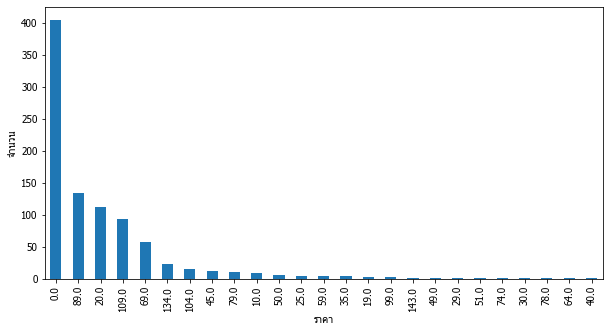

In [43]:
plt.figure(figsize=(10,5))
df_deli.ship_fee.value_counts().plot.bar()
plt.xlabel("ราคา")
plt.ylabel("จำนวน")

In [44]:
df_deli["cash_on_deli"] = df_deli.delivery_options.str.contains('สามารถเก็บเงินปลายทางได้')

/Users/layyer/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'จำนวน')

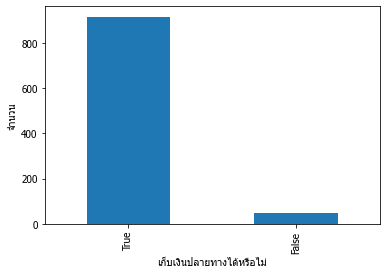

In [45]:
df_deli.cash_on_deli.value_counts().plot.bar()
plt.xlabel("เก็บเงินปลายทางได้หรือไม่")
plt.ylabel("จำนวน")

In [46]:
df_deli.head()

,delivery_options,howto_delivery,sent_day,ship_fee,cash_on_deli
0,แบบธรรมดา5 วัน฿20.00สามารถเก็บเงินปลายทางได้,ธรรมดา,5,20,True
1,แบบธรรมดา5 วัน฿89.00สามารถเก็บเงินปลายทางได้,ธรรมดา,5,89,True
2,แบบธรรมดา5 วัน฿20.00สามารถเก็บเงินปลายทางได้,ธรรมดา,5,20,True
3,แบบธรรมดา5 วัน฿20.00สามารถเก็บเงินปลายทางได้,ธรรมดา,5,20,True
4,แบบธรรมดา5 วัน฿89.00สามารถเก็บเงินปลายทางได้,ธรรมดา,5,89,True


ยังมีข้อผิดพลาดบางส่วน
- ไม่ทราบจำนวนวันที่ใช้ส่งในกรณี โดยลาซาด้า,Delivered by Seller
- การหาค่าส่งอาจมีข้อผิดพลาดเช่นตัวอย่างข้างล่างที่มีการฟรีค่าจัดส่งบางส่วน

In [47]:
#ตัวอย่างข้อผิดพลาด
df_deli.loc[104]

delivery_options    แบบธรรมดา3 - 5 วัน฿69.00ฟรีค่าจัดส่ง ฿20.00 เม...
howto_delivery                                                 ธรรมดา
sent_day                                                            5
ship_fee                                                            0
cash_on_deli                                                     True
Name: 104, dtype: object

### สรุป การส่งสินค้า
- สินค้าส่วนมาก 90%+ ส่งจากในประเทศไทย
- ส่วนใหญ่ใช้เวลาส่งน้อย (2-3) วัน
- ส่วนใหญ่่ส่งฟรี
- ส่วนใหญ่เก็บเงินปลายทางได้

## คะแนนร้านค้า 
###  seller_rating

Text(0, 0.5, 'จำนวน')

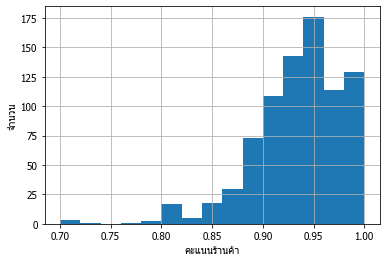

In [48]:
df.positive_seller_rating.hist(bins=15)
plt.xlabel("คะแนนร้านค้า")
plt.ylabel("จำนวน")

**- บางร้านขายของหลายชิ้น**

Text(0, 0.5, 'จำนวน')

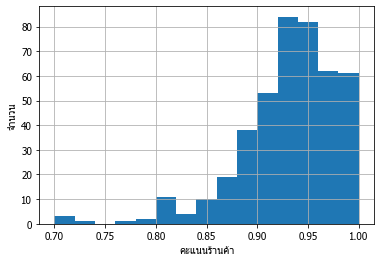

In [49]:
df.groupby('store_name').mean()['positive_seller_rating'].hist(bins=15)
plt.xlabel("คะแนนร้านค้า")
plt.ylabel("จำนวน")

###  ship_on_time

In [50]:
df.ship_on_time[df.ship_on_time=='ข้อมูลไม่เพียงพอ'] = None

/Users/layyer/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df.ship_on_time

0      0.67
1      0.64
2      0.64
3      0.64
4      0.69
       ... 
995     91%
996    None
997     98%
998     97%
999    100%
Name: ship_on_time, Length: 1000, dtype: object

**บางตัวเป็น float บางตัวเป็น string ที่มี %**

In [52]:
for index,val in enumerate(df.ship_on_time.values):
    if(type(val) == str):
        df.ship_on_time[index] = float(val.replace('%',''))/100
        

/Users/layyer/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
df.ship_on_time = df.ship_on_time.fillna(np.nan)

Text(0, 0.5, 'จำนวน')

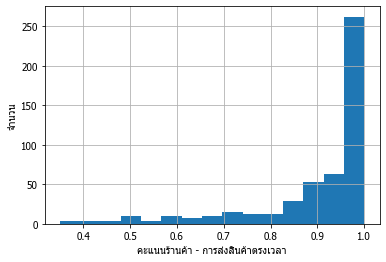

In [54]:
df.groupby('store_name').mean()['ship_on_time'].hist(bins=15)
plt.xlabel("คะแนนร้านค้า - การส่งสินค้าตรงเวลา")
plt.ylabel("จำนวน")

###  chat_response_rate  remove % to float 

In [55]:
df.chat_response_rate[df.chat_response_rate=='ข้อมูลไม่เพียงพอ'] = None

/Users/layyer/anaconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
df.chat_response_rate = df.chat_response_rate.str.replace('%','').astype(float)/100

Text(0, 0.5, 'จำนวน')

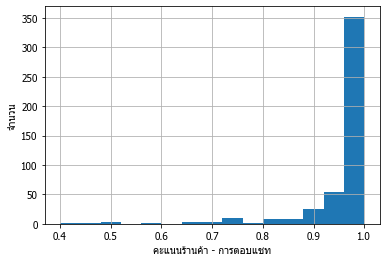

In [57]:
df.groupby('store_name').mean()['chat_response_rate'].hist(bins=15)
plt.xlabel("คะแนนร้านค้า - การตอบแชท")
plt.ylabel("จำนวน")

### สรุปร้านค้า
- ร้านค้าส่วนมากมีคะแนนสูงมาก

## สร้าง Data Mart

In [58]:
dataMart = pd.concat([df[['sale_price','warranty','positive_seller_rating','ship_on_time','chat_response_rate','brand','score-average','store_name']]
           ,df_promo[['promo_clus']],df_deli[['howto_delivery','sent_day','ship_fee','cash_on_deli']]],axis = 1)
dataMart["rank"] = df.index

In [59]:
dataMart.head(10)

,sale_price,warranty,positive_seller_rating,ship_on_time,chat_response_rate,brand,score-average,store_name,promo_clus,howto_delivery,sent_day,ship_fee,cash_on_deli,rank
0,1090.0,warranty,0.92,0.67,1.00,No Brand,5.0,TOR-SHOP,1,ธรรมดา,5,20,True,0
1,1065.0,no_warranty,0.91,0.64,0.98,No Brand,0.0,KOHLER,0,ธรรมดา,5,89,True,1
2,1480.0,no_warranty,0.91,0.64,0.98,No Brand,5.0,KOHLER,0,ธรรมดา,5,20,True,2
3,1060.0,warranty,0.96,0.64,1.00,No Brand,5.0,NAFENG,0,ธรรมดา,5,20,True,3
4,1065.0,warranty,0.96,0.69,0.97,No Brand,0.0,FOTILE,0,ธรรมดา,5,89,True,4
5,1230.0,warranty,0.93,0.53,0.95,No Brand,5.0,Khongde,1,ธรรมดา,5,20,True,5
6,1119.0,warranty,0.92,0.73,0.98,No Brand,4.9,KaiShengShop,1,ธรรมดา,5,20,True,6
7,1478.0,no_warranty,0.94,0.66,0.97,No Brand,5.0,Weilong,0,ธรรมดา,5,20,True,7
8,1029.0,warranty,0.95,0.72,1.00,No Brand,5.0,LAL,1,ธรรมดา,5,20,True,8
9,1488.0,no_warranty,0.98,0.57,1.00,No Brand,5.0,Shidai 1587645722,0,ธรรมดา,5,89,True,9


#  4. หาคำตอบจากข้อมูล
## ราคาและจำนวนวันในการส่งมีผลต่ออันดับอย่างไร

In [60]:
#ส่งฟรีและส่งไว
len(dataMart[(dataMart["ship_fee"]==0 )& (dataMart["sent_day"]<=3)])

294

In [61]:
dataMart[(dataMart["ship_fee"]==0 )& (dataMart["sent_day"]<=3)][['rank']]

,rank
105,105
110,110
111,111
112,112
117,117
...,...
983,983
990,990
992,992
995,995


In [62]:
dataMart[:100].groupby(['sent_day','ship_fee']).count()[['rank']]

rank
sent_day ship_fee      
5        20.0        79
         89.0        10
6        20.0         6

In [63]:
dataMart[:100].groupby(['sent_day','ship_fee']).count()[['rank']]

rank
sent_day ship_fee      
5        20.0        79
         89.0        10
6        20.0         6

## Brand ของสินค้าในช่วง 1000-2000 (ช่วงที่ขายดี)

Text(0, 0.5, 'จำนวน')

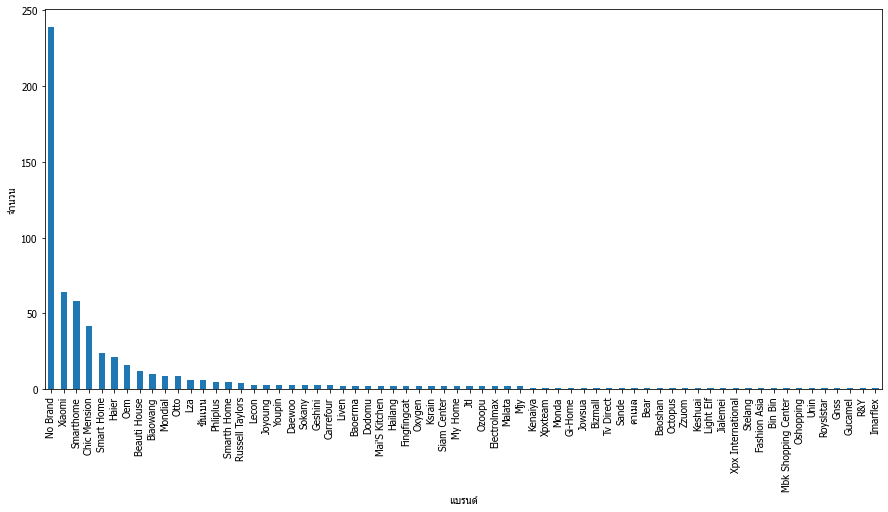

In [64]:
plt.figure(figsize=(15,7))
df[(dataMart.sale_price>1000) & (dataMart.sale_price<=2000)].brand.value_counts().plot.bar()
plt.xlabel("แบรนด์")
plt.ylabel("จำนวน")

## Brand สินค้าที่ราคามากกว่า 5000 บาท

Text(0, 0.5, 'จำนวน')

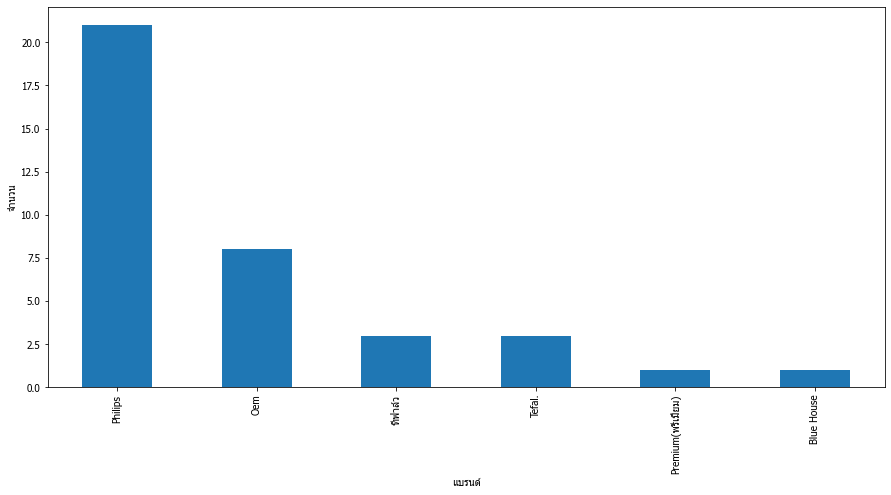

In [65]:
plt.figure(figsize=(15,7))
dataMart[(dataMart.sale_price>5000)].brand.value_counts().plot.bar()
plt.xlabel("แบรนด์")
plt.ylabel("จำนวน")

## Brand สินค้าที่ราคาต่ำกว่า 1000 บาท

Text(0, 0.5, 'จำนวน')

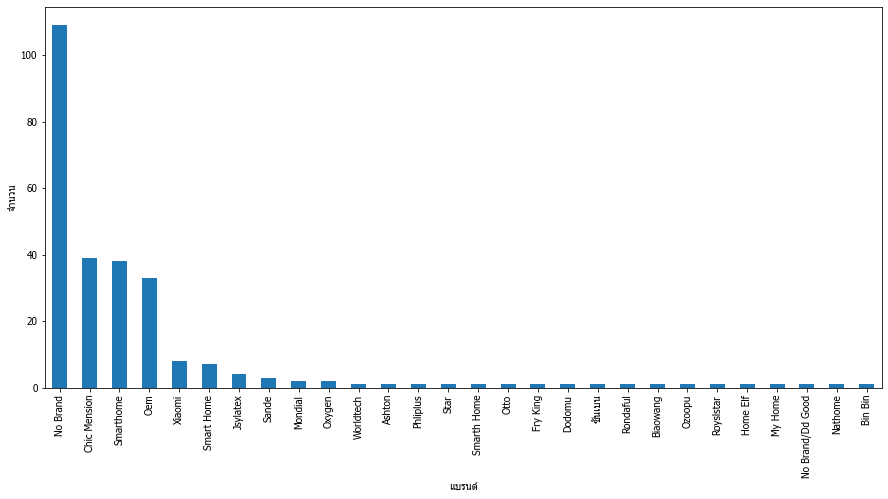

In [66]:
plt.figure(figsize=(15,7))
dataMart[dataMart.sale_price<1000].brand.value_counts().plot.bar()
plt.xlabel("แบรนด์")
plt.ylabel("จำนวน")

ราคาเฉลี่ยแต่ละแบรนด์

Text(0, 0.5, 'จำนวน')

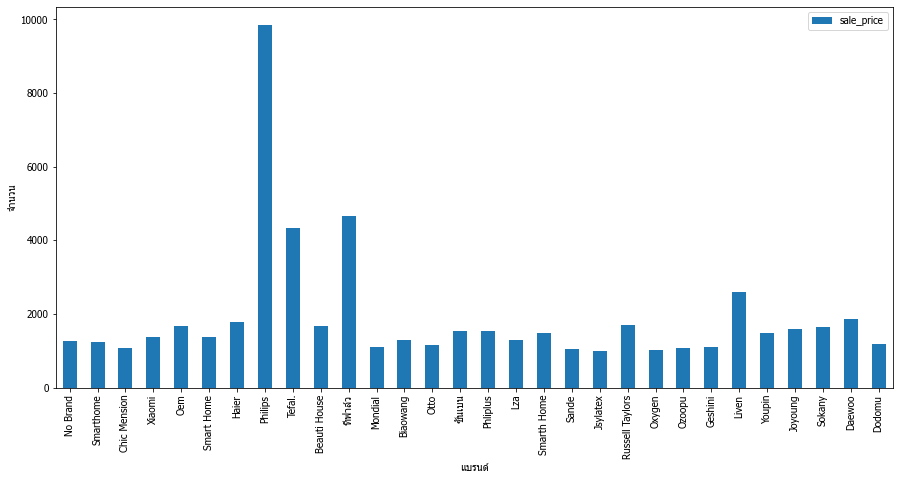

In [67]:
dataMart.groupby('brand').mean()[['sale_price']].loc[dataMart['brand'].value_counts().index][:30].plot.bar(figsize=(15,7))
plt.xlabel("แบรนด์")
plt.ylabel("จำนวน")

## ความสัมพันธ์ระหว่าง ราคาสินค้าและการรับประกัน

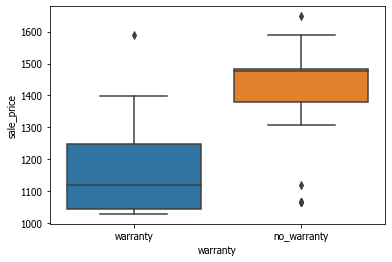

In [68]:
sns.boxplot(data = dataMart.iloc[:50][['sale_price','warranty']],x='warranty',y='sale_price')

Text(0, 0.5, 'จำนวน')

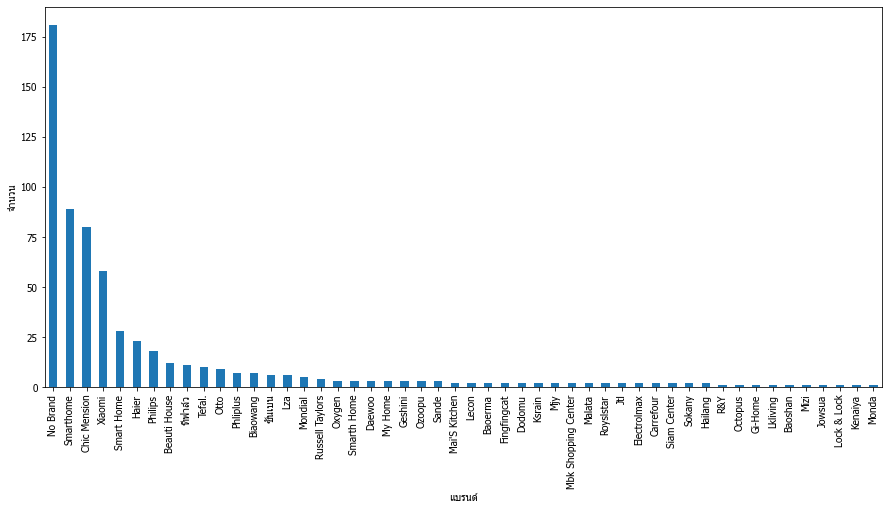

In [69]:
dataMart.brand[dataMart.warranty=='warranty'].value_counts()[:50].plot.bar(figsize=(15,7))
plt.xlabel("แบรนด์")
plt.ylabel("จำนวน")

Text(0, 0.5, 'จำนวน')

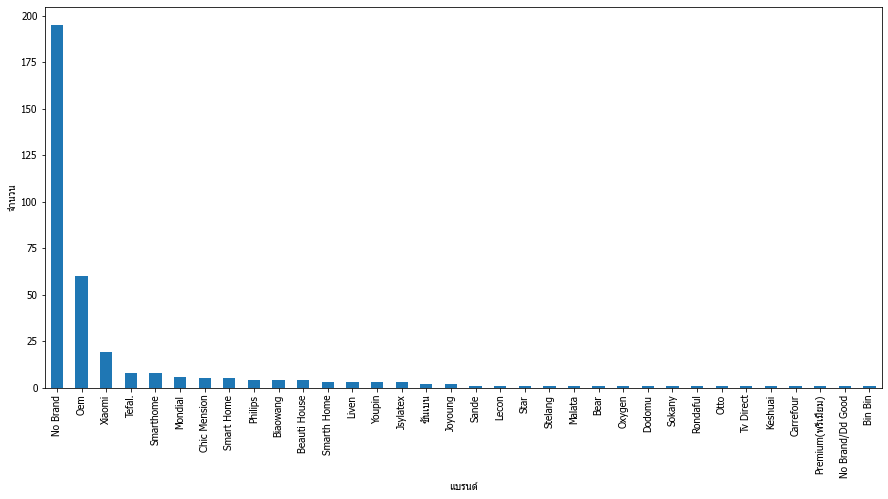

In [70]:
dataMart.brand[df.warranty=='no_warranty'].value_counts()[:50].plot.bar(figsize=(15,7))
plt.xlabel("แบรนด์")
plt.ylabel("จำนวน")

# 5.คำถามใหม่
## ทำไมสินค้าที่ไม่มีแบรนด์ถึงเยอะและขายดี

### เช็คข้อผิดพลาด โดยเทียบ Brand กับ text title

In [71]:
brands_list = list(df.brand.unique())
brands_list.remove('No Brand')
for text in df[df.brand=='No Brand']['textTitle'].values:
    for br in brands_list:
        if str(br) in str(text):
            print(text)
            print('\n')

เครื่องทอดไร้มัน เครื่องทอดอัจฉริยะ อุปกรณ์หม้อทอดไฟฟ้า 6 นิ้ว7 นิ้ว 8 นิ้ว ชุด Air fryerอุปกรณ์เสริม ถาดอบแบบไม่ติด จานพิซซ่า ตะกร้าเค้ก ชั้นวางบาร์บีคิว อบคุณภาพสูงอุปกรณ์เสริมSMARTHOME Tefal XIAOMI Haierหม้อทอดOTTO Philipsเหมาะสำหรับหม้อทอดไฟฟ้าทุกรุ่น


เครื่องทอดไร้มัน เครื่องทอดอัจฉริยะ อุปกรณ์หม้อทอดไฟฟ้า 6 นิ้ว7 นิ้ว 8 นิ้ว ชุด Air fryerอุปกรณ์เสริม ถาดอบแบบไม่ติด จานพิซซ่า ตะกร้าเค้ก ชั้นวางบาร์บีคิว อบคุณภาพสูงอุปกรณ์เสริมSMARTHOME Tefal XIAOMI Haierหม้อทอดOTTO Philipsเหมาะสำหรับหม้อทอดไฟฟ้าทุกรุ่น


Air Fryer Smarthome หม้อทอดไร้น้ำมัน (ประกัน 3 ปี ) หม้อทอดไฟฟ้าไร้น้ำมันเพื่อสุขภาพ 5.2 ลิตร ใหญ่มาก


HD9910 Grill Pan For Philips Air Fryer สำหรับ รุ่น HD9220


Trueshopping Smart Home Airfryer หม้อทอดไร้น้ำมัน รุ่น MV-021 ขนาด 3.5L


Malata เครื่องใช้ไฟฟ้าในบ้านsmart home เครื่องทอดอากาศ สุขภาพดีและปราศจากน้ำมัน หม้อทอดลมสีดำ 1200W 4L


Xiaomi Air Fryers Xiaomi Air Fryers หม้อทอด เครื่องทอดไร้มัน เครื่องทอดอัจฉริยะ หม้อทอดไร้น้ำมัน หม้อทอดไฟฟ้า หม้อทอดลมร้อน หม้อทอดไฟฟ้าอัจฉร

In [72]:
count = 0
brands_list = list(df.brand.unique())
brands_list.remove('No Brand')
for text in df[df.brand=='No Brand']['textTitle'].values:
    for br in brands_list:
        if str(br) in str(text):
            count += 1
            continue
print(count)

19


## แบ่งกลุ่มเป็นมีแบรนด์กับไม่มีแบรนด์

In [73]:
dataMart["haveBrand"] = ~(df.brand=='No Brand')

In [74]:
dataMart['haveBrand']

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996    False
997     True
998     True
999     True
Name: haveBrand, Length: 1000, dtype: bool

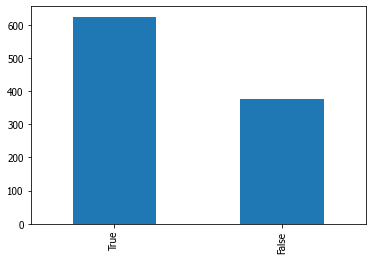

In [75]:
dataMart['haveBrand'].value_counts().plot.bar()

### ราคาขายของสินค้าที่มีแบรนด์ / ไม่มี

In [76]:
dataMart[['haveBrand','sale_price']].groupby('haveBrand').mean()

,sale_price
haveBrand,
False,1258.732080
True,1840.978439


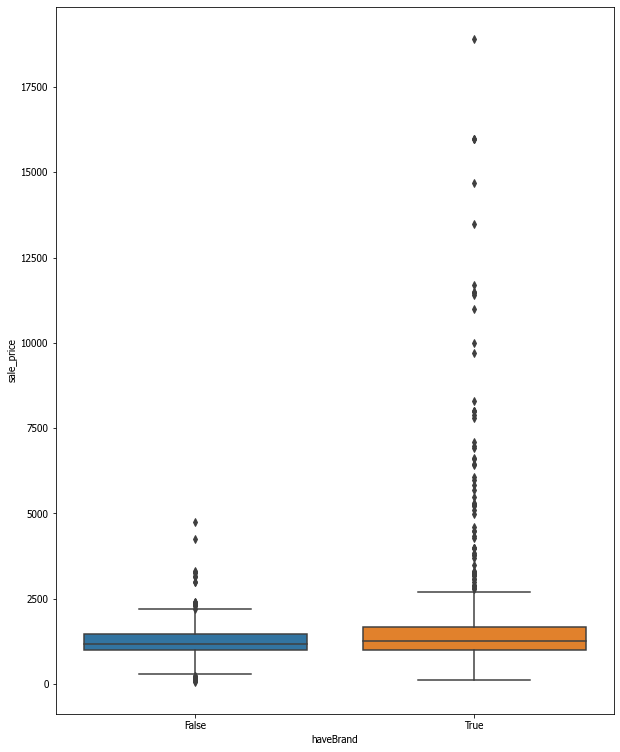

In [77]:
plt.figure(figsize=(10,13))
sns.boxplot(data=dataMart[['haveBrand','sale_price']],x='haveBrand',y='sale_price')

### ความสัมพันธ์ระหว่างสินค้าที่มี/ไม่มี แบรนด์กับการรับประกัน

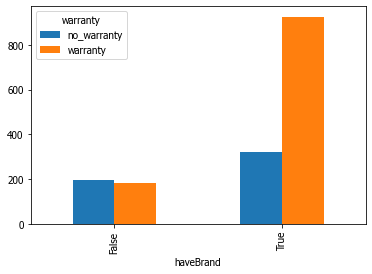

In [78]:
dataMart[['haveBrand','warranty']].pivot_table(index='haveBrand',columns='warranty',values='warranty',aggfunc=np.count_nonzero).plot.bar()

### ร้านค้า

In [79]:
data_store = dataMart.groupby('store_name').mean()
data_store["num_sale"] = dataMart.groupby('store_name').count()['rank']
data_store = data_store.sort_values('rank')
data_store

,sale_price,positive_seller_rating,ship_on_time,chat_response_rate,score-average,promo_clus,rank,haveBrand,num_sale
store_name,,,,,,,,,
LAL,1029.000000,0.95,0.72,1.00,5.0,1.0,8.000000,0.0,1
Weilong,1307.666667,0.94,0.66,0.97,5.0,0.0,11.000000,0.0,3
NAFENG,1342.666667,0.96,0.64,1.00,5.0,0.0,15.000000,0.0,3
siemens 1587541157,1350.802500,0.95,0.73,0.98,5.0,0.0,23.250000,0.0,4
HengDa 1587638981,1313.666667,0.98,0.70,1.00,5.0,0.0,28.333333,0.0,3
...,...,...,...,...,...,...,...,...,...
iPhoneWorld4,7090.000000,NaN,NaN,NaN,5.0,0.0,992.000000,1.0,1
Girlfriend mall,1320.000000,1.00,0.91,1.00,5.0,1.0,995.000000,1.0,1
wu1076,701.000000,NaN,NaN,NaN,0.0,0.0,996.000000,0.0,1


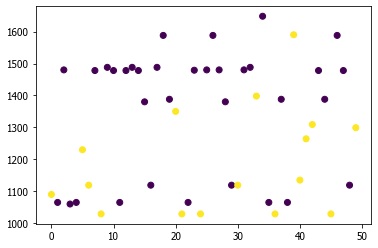

In [80]:
plt.scatter(dataMart[:50].index,dataMart[:50].sale_price,c=dataMart[:50].promo_clus)